# 🔹 Support Vector Machines

- **Support vector machines (SVMs)** are powerful yet flexible supervised machine learning algorithms which are used both for **classification** and **regression**.  
- It is an advanced machine learning technique which has a unique way of solving complex problems such as **image recognition**, **face detection**, **voice detection**, etc.

---

## Hyperplane 🟢

It is **decision boundary** that separates different classes in feature space.

- In 2D: a line, in 3D: a plane, in higher dimensions: hyperplane.  
- **Goal:** Find the **optimal hyperplane** that maximizes separation between classes.  
- In machine learning, hyperplanes act as **decision boundaries**.  
- **Support vectors** are the data points closest to the hyperplane.  
- The **optimal hyperplane** (or **maximal margin hyperplane**) is the one **farthest from the nearest data points**, maximizing the margin.

---

## Margin 📏

It is the distance between the hyperplane and the closest data points from each class.  
The margin measures how well the hyperplane separates the classes, and support vectors define it.

- **Margin** is the **perpendicular distance** between the hyperplane and the nearest data points of each class.  
- **Support vectors** are the **closest data points** that determine this margin.  
- A **large margin** is desirable — it indicates a clear separation between classes.  
- A **small margin** is less ideal — it means the classes are close and the classifier may be less robust.

---

### Linear SVM ➖

It uses a linear decision boundary (line or hyperplane) to separate classes. It works best when data is linearly separable, and the optimal hyperplane maximizes the margin between classes.

- **Boundary:** Straight line (2D) or flat hyperplane (higher dimensions).  
- **Use case:** Works well when data is roughly linearly separable.  
- **Speed:**  Fast, scales well for large datasets.  
- **Interpretability:** Easy; coefficients indicate feature importance.  
- **Flexibility:** Limited to linear separation.  
- **Example:** Spam vs Ham email classification using text features.

---

### Kernel SVM 🔄

A function that maps data to a higher-dimensional space enabling SVM to handle non-linearly separable data.

- **Boundary:** Curved or complex boundary created using a **kernel trick**.  
- **Use case:** Useful when data is **non-linearly separable**.  
- **Speed:**  Slower; computes a kernel matrix, which is expensive for large datasets.  
- **Interpretability:** Harder to interpret; the transformation is implicit.  
- **Flexibility:** Very flexible; can separate complex patterns.  
- **Example:** XOR problem, concentric circle classification, complex medical data.

---

**In short:**  

- **Linear SVM:** Fast, simple, straight cut   
- **Kernel SVM:** Flexible, handles complex patterns, but slower ⚡


# 🔹 Naive Bayes

Naive Bayes is a **classification algorithm** that uses probability to predict which category a data point belongs to, assuming that all features are **conditionally independent**.  

---

## 🟢 Types of Naive Bayes
1. **Gaussian Naive Bayes**
2. **Multinomial Naive Bayes**
3. **Bernoulli Naive Bayes**

---

## 1️⃣ Gaussian Naive Bayes
- Handles **continuous numerical features**.  
- Assumes each feature follows a **bell-shaped (normal) distribution**.  
- Works well when data points cluster around a mean.  
- **Example:** Predicting a student’s grade based on study hours and attendance.  

**When to use:**  
- Features are **continuous** (heights, weights, exam scores, etc.)  

**Why to use:**  
- Assumes data follows a **normal (Gaussian) distribution**, suitable for many real-world continuous datasets.  

**How to use:**  
- Standardize/normalize continuous features if needed.  
- Fit `GaussianNB` from `sklearn` to the data.  

---

## 2️⃣ Multinomial Naive Bayes
- Handles **discrete counts**, like the number of times a word appears in a document.  
- Focuses on **term frequencies**.  
- Common in **text classification**, sentiment analysis, and spam detection.  
- **Example:** Counting how often “free” or “offer” appears in emails to detect spam.  

**When to use:**  
- Features are **counts** or **frequency-based** (e.g., word occurrences).  

**Why to use:**  
- Models discrete distributions well and works great in **text classification** problems.  

**How to use:**  
- Convert text into **term frequency vectors** (Bag of Words or TF-IDF).  
- Train `MultinomialNB` with those vectors.  

---

## 3️⃣ Bernoulli Naive Bayes
- Handles **binary features** (0 or 1, yes or no).  
- Each feature represents the **presence or absence** of an attribute.  
- Good for text classification where only the presence of words matters, not the frequency.  
- **Example:** Checking if certain keywords appear in emails to classify them as spam or not.  

**When to use:**  
- Features are **binary** (yes/no, 0/1, present/absent).  

**Why to use:**  
- Only cares about **presence or absence**, not frequency.  

**How to use:**  
- Convert features into binary form (word present = 1, absent = 0).  
- Train `BernoulliNB` on this binary matrix.  

---

## ⚡ In short

- **Gaussian →** continuous values (normal distribution)  
- **Multinomial →** discrete counts (word frequencies)  
- **Bernoulli →** binary features (present/absent)  


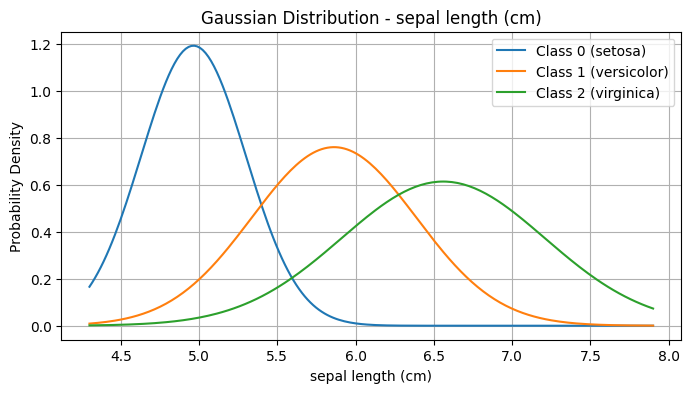

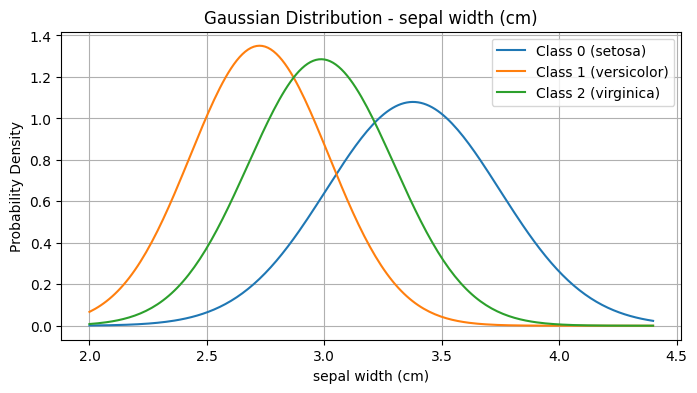

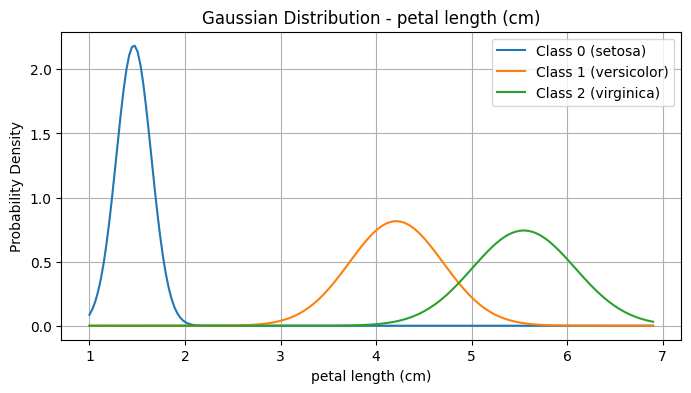

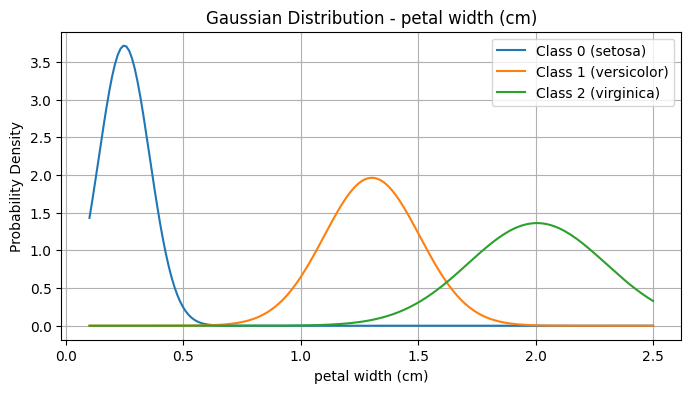

The Accuracy of Prediction on Iris Flower is: 0.978


In [1]:
# Gaussian Naive Bayes 
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 2. Loading the Dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

X = data.drop("Species", axis=1)
y = data['Species']

# 3. Encoding and Splitting Dataset
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Creating and Training the Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 5. Plotting Gaussian Distributions for Each Feature
feature_names = iris.feature_names
num_features = len(feature_names)
num_classes = len(np.unique(y))
X_np = X.to_numpy()

for feature_index in range(num_features):
    feature_name = feature_names[feature_index]
    x_vals = np.linspace(X_np[:, feature_index].min(),
                         X_np[:, feature_index].max(), 200)

    plt.figure(figsize=(8, 4))

    for cls in range(num_classes):
        mean = gnb.theta_[cls, feature_index]
        std = np.sqrt(gnb.var_[cls, feature_index])
        y_vals = norm.pdf(x_vals, mean, std)
        plt.plot(x_vals, y_vals, label=f"Class {cls} ({iris.target_names[cls]})")

    plt.title(f"Gaussian Distribution - {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# 6. Making Predictions
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction on Iris Flower is: {accuracy:.3f}")


**What does the code do:**

- Prepares features (X) and target (y).
- Splits data into training (70%) and testing (30%).
- Trains a Gaussian Naive Bayes model.
- Plots Gaussian probability distributions for each feature per class.
- Evaluates accuracy on test data.

Accuracy: 66.67%

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.50      1.00      0.67         1
        Spam       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



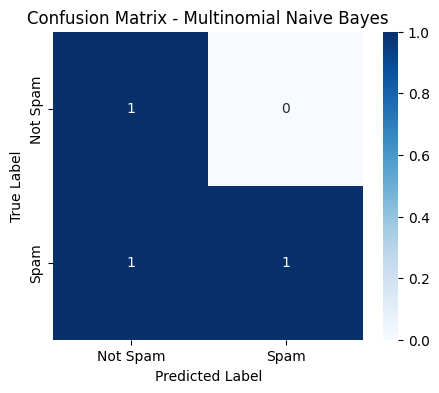

Prediction for custom message: Spam


In [3]:
#  Multinomial Naive Bayes
# 1. Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Creating the Dataset
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': [
        'spam', 'spam', 'not spam', 'not spam', 'spam',
        'not spam', 'spam', 'not spam', 'spam', 'not spam'
    ]
}

df = pd.DataFrame(data)

# 3. Mapping Labels to Numerical Values
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})

# 4. Splitting the Data
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Vectorizing the Text Data
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# 6. Training the Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

# 7. Making Predictions and Evaluating Accuracy
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 8. Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Not Spam", "Spam"],
            yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 10. Predicting for a Custom Message
custom_message = ["Congratulations, you've won a free vacation"]
custom_vector = vectorizer.transform(custom_message)
prediction = model.predict(custom_vector)

print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")

Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

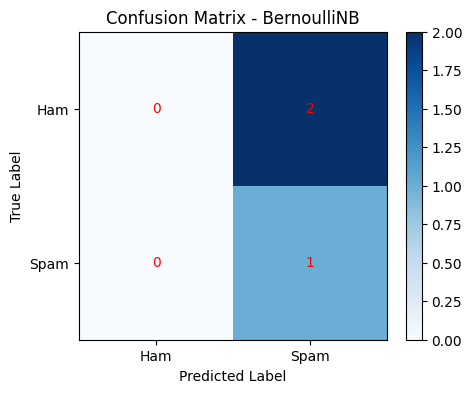

Custom Prediction: Spam


In [4]:
# Bernoulli Naive Bayes
# Importing Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# 1. Create a small dataset (Ham=0, Spam=1)
data = {
    "text": [
        "Win a free iPhone now", 
        "Limited offer just for you", 
        "Congratulations, you have won a lottery", 
        "Your friend is waiting for you at the cafe", 
        "Are we still meeting tomorrow?", 
        "Call me when you are free", 
        "Get cheap loans instantly", 
        "Earn money fast online",
        "Hey, can you send me the notes?",
        "Let's have lunch together"
    ],
    "label_num": [1,1,1,0,0,0,1,1,0,0]  # 1=Spam, 0=Ham
}

df = pd.DataFrame(data)

# 2. Features & Labels
X = df["text"].values
y = df["label_num"].values

# 3. Convert text into binary features (BernoulliNB)
cv = CountVectorizer(binary=True)
X = cv.fit_transform(X)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# 6. Predictions
y_pred = bnb.predict(X_test)

# 7. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix - BernoulliNB")
plt.colorbar()

classes = ["Ham", "Spam"]
plt.xticks(range(len(classes)), classes)
plt.yticks(range(len(classes)), classes)

# Add numbers inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# 9. Test custom message
msg = ["Congratulations! You won a free ticket"]
msg_vec = cv.transform(msg)
print("Custom Prediction:", "Spam" if bnb.predict(msg_vec)[0] == 1 else "Ham")


## Hands-on

In [3]:
# 1. Build Gaussian Naive Bayes manually (use Bayes theorem)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load Iris dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Gaussian Naive Bayes implementation
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9   # avoid division by zero
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def _gaussian_pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        posteriors = []

        for c in self.classes:
            prior = np.log(self.priors[c])
            conditional = np.sum(np.log(self._gaussian_pdf(c, x)))
            posterior = prior + conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

# Train and test
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy (Manual Gaussian NB):", accuracy)


Accuracy (Manual Gaussian NB): 0.9777777777777777


**What this code does:**

- **Loads the Iris dataset** and splits it into training (70%) and testing (30%) sets.
- **Defines a custom Gaussian Naive Bayes class**:
    - `fit`: Calculates **mean, variance, and prior probabilities** for each class.
    - `_gaussian_pdf`: Computes the **probability density function** for a Gaussian distribution.
    - `_predict_single`: Calculates the **posterior probability** for each class for a single sample and predicts the class with the highest posterior.
    - `predict`: Applies `_predict_single` to all samples in the test set.
- **Trains the model** on the training data using `fit`.
- **Makes predictions** on the test set using `predict`.
- **Calculates accuracy** by comparing predictions to the actual labels.

**Key Concepts:**

- **Gaussian Naive Bayes assumption:** Each feature is normally distributed (Gaussian) for each class.
- **Bayes theorem:** Used to compute the probability of a class given feature values.
- **Log probabilities:** Used to avoid underflow when multiplying many small probabilities.
- **Manual implementation:** Helps understand the math behind Naive Bayes rather than relying on `sklearn`.

**Output:** Prints the accuracy of the manually implemented Gaussian Naive Bayes classifier on the test set.

In [6]:
#Train sklearn.svm.SVC with linear & RBF kernel

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load Data (Iris dataset)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2. SVM with Linear Kernel
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

print("SVM (Linear Kernel) Accuracy:", acc_linear)

# 3. SVM with RBF Kernel
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("SVM (RBF Kernel) Accuracy:", acc_rbf) 

SVM (Linear Kernel) Accuracy: 1.0
SVM (RBF Kernel) Accuracy: 1.0


---
**What this code does:**

- Loads the Iris dataset and splits it into training and testing sets (70%-30%).
- Trains a **Support Vector Machine (SVM)** classifier with a **linear kernel**.
- Makes predictions on the test set using the linear kernel SVM.
- Calculates and prints the **accuracy** for the linear kernel SVM.
- Trains another SVM classifier with a **RBF (Radial Basis Function) kernel**.
- Makes predictions and calculates the accuracy for the RBF kernel SVM.
- Compares the performance of linear vs. RBF kernel SVMs on the same dataset.

**Key Concepts:**

- **Linear Kernel:** Assumes data is linearly separable (a straight line can separate classes).
- **RBF Kernel:** Can handle non-linear data by mapping it to higher dimensions for separation.
- **Accuracy:** Measures how many predictions match the actual labels.